In [1]:
#Sales Forecasting

In [11]:
#Step 1: Importing Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [12]:
#Step 2: Reading the data
data = pd.read_csv("/Users/sarahasad/Downloads/Sales dataset.csv") 
#data = pd.read_csv("C:\\Users\\IndiaAI Data Lab\\Downloads\\Sales dataset.csv")

In [13]:
#Checking the dimensions of data
shape = data.shape
print("Shape of the data is:", shape)

Shape of the data is: (9800, 18)


In [14]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [15]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [17]:
#Step 3: Data Cleaning
data.isnull().sum()
#Note: Missing values in unused columns are not being handled as they are not used for analysis.

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [18]:
#Step 4: Exploratory Data Analysis
data.describe().style.background_gradient(cmap ='RdPu')

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


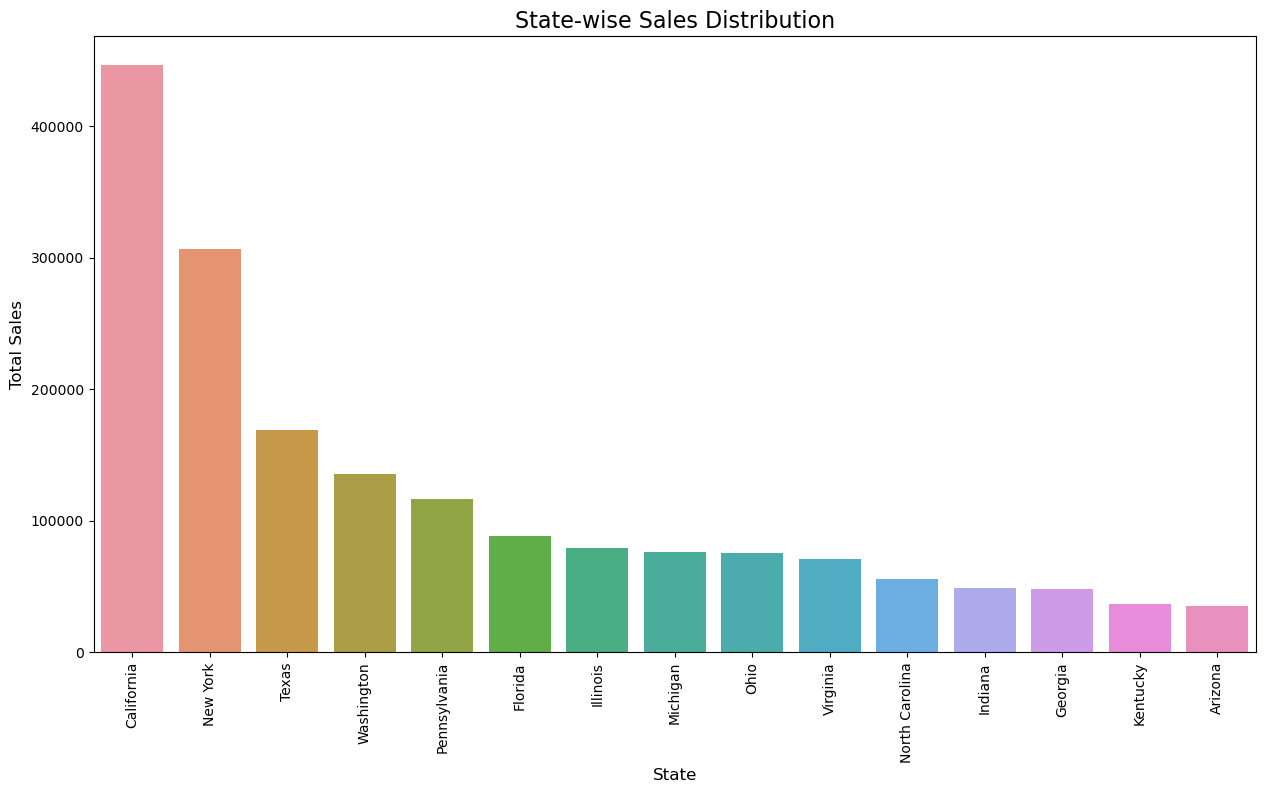

In [19]:
#Top 15 States with highest sales
state_sales = data.groupby('State')['Sales'].sum().reset_index()
state_sales = state_sales.sort_values(by='Sales', ascending=False)
top_15_countries = state_sales.head(15)

plt.figure(figsize=(15, 8))  # Set the figure size (width, height)
sns.barplot(x='State', y='Sales', data=top_15_countries)
plt.title('State-wise Sales Distribution', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.show()

In [22]:
#Convert 'Order Date' column to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

In [23]:
#Extracting relevant features from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

In [24]:
#Step 5: Feature Selection
X = data[['Order Day', 'Order Month', 'Order Year', 'Order Day of Week']]
y = data['Sales']

In [25]:
#Step 6: Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [26]:
#Step 7: Data Modeling and Training
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [27]:
#Model Prediction
y_pred = LR_model.predict(X_test)

In [28]:
#Step 8: Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of LR Model:", mse_lr)

Mean Squared Error of LR Model: 294515.0339144744


In [29]:
#Model 2: Random Forest Model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
#Make predictions
y_pred = rfr_model.predict(X_test)

In [31]:
#Model Evaluation
mse_rfr = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of RFR Model:", mse_rfr)

Mean Squared Error of RFR Model: 362315.6760424176


In [32]:
#Model 3: Decision Tree Model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
#Make predictions
y_pred = decision_tree.predict(X_test)

In [34]:
#Evaluate the model
mse_dtr = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of DTR Model:", mse_dtr)

Mean Squared Error of DTR Model: 362985.90803635766
